## Naive Bayes Classifier

### Preface

**Acknowledgements**

- Naive Bayes Theory: https://www.youtube.com/watch?v=Q8l0Vip5YUw

**Packages**

In [1]:
import pandas as pkg_pandas
import sklearn.model_selection as pkg_model_selection
import sklearn.naive_bayes as pkg_naive_bayes
import sklearn.metrics as pkg_metrics
import matplotlib.pyplot as pkg_plot
import seaborn as pkg_seaborn

### Prepare Data

**Load Data**

In [2]:
%matplotlib inline

In [3]:
dataset_df = pkg_pandas.read_csv("../data/cbex-titanic-passengers.csv")
dataset_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset_df.drop(columns=["passenger_id", "name", "sib_sp", "parch", "ticket", "cabin", "embarked"], inplace=True)
dataset_df.head()

,survived,passenger_class,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


**Curate Data**

In [5]:
# Find columns which have NaN values
dataset_df.columns[dataset_df.isna().any()]

Index(['age'], dtype='object')

In [6]:
dataset_df["age"].fillna(int(dataset_df["age"].mean()), inplace=True)

In [7]:
# Make sure there are no more NaN values in any of the columns
dataset_df.columns[dataset_df.isna().any()]

Index([], dtype='object')

In [8]:
# Encode non-numeric columns
dummies_df = pkg_pandas.get_dummies(dataset_df["sex"])
dataset_df = pkg_pandas.concat([dataset_df, dummies_df], axis="columns")
dataset_df.drop(columns=["sex"], inplace=True)
dataset_df.head()

,survived,passenger_class,age,fare,female,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


**Split Data**

In [9]:
output_column_name = "survived"
baseline_outputs = dataset_df[output_column_name]
baseline_inputs = dataset_df.drop(columns=[output_column_name])

In [10]:
train_inputs, test_inputs, train_outputs, test_outputs = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.3)

train_inputs.shape, test_inputs.shape, train_outputs.shape, test_outputs.shape

((623, 5), (268, 5), (623,), (268,))

### Process Data

**Model**

In [11]:
model = pkg_naive_bayes.GaussianNB()
model

GaussianNB()

In [12]:
model.fit(X=train_inputs, y=train_outputs)

GaussianNB()

In [13]:
model.score(X=test_inputs, y=test_outputs)

0.7611940298507462

In [14]:
predicted_outputs = model.predict(test_inputs)
predicted_outputs.shape

(268,)

In [15]:
model.predict_proba(test_inputs[:10]), predicted_outputs[:10]

(array([[0.04108726, 0.95891274],
        [0.00600972, 0.99399028],
        [0.98282014, 0.01717986],
        [0.93463436, 0.06536564],
        [0.9455951 , 0.0544049 ],
        [0.92718456, 0.07281544],
        [0.94561483, 0.05438517],
        [0.99058768, 0.00941232],
        [0.00317526, 0.99682474],
        [0.9903753 , 0.0096247 ]]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0]))

**Deviation**

In [16]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=predicted_outputs)
cm

array([[136,  30],
       [ 34,  68]])

<AxesSubplot:>

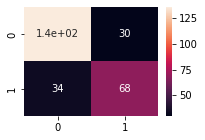

In [17]:
pkg_plot.figure(figsize=(3,2))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)